# Scikit-Learn Quick Reference for DS-420

I'll do my best to collect and publish the various sklearn objects and methods we use in class here.  If I miss something or you can clarify something, please feel free to make a PR.

Keep in mind that most things in sklearn have a consistent interface:

* fit
* transform
* fit_transform
* predict
* score


## Basic Imports

There are quite a few imports that we need to get everything loaded into our notebooks.  Below is a cell that you can copy and paste into a notebook to get going.

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import math

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans


## Preprocessing

Functions used during data cleaning and preparation 

### LabelEncoder

The label Encoder works on a column and re-maps the names in the column to numbers.

    labelencoder=LabelEncoder()
    labelencoder.fit(data.odor)
    labelencoder.classes_
    labelencoder.transform(data.odor)
    
The `fit` method takes the column and creates an internal mapping (dictionary) from name to number.

The `transform` method takes that same column and returns the numbers.

The `fit_transform` method simply combines both steps into one.

In [2]:
le = LabelEncoder()
le.fit(['a','b','c'])
print(le.classes_)
le.transform(['a','b','c'])

['a' 'b' 'c']


array([0, 1, 2])

### OneHotEncoder

More on this soon


### Scaler

    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X=scaler.fit_transform(X)
    


In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
scaler = StandardScaler()
minmaxer = MinMaxScaler()
normer = Normalizer()

X = pd.DataFrame({'a': [1, 2, 3], 'b': [100, 300, 500]})
scaler.fit_transform(X)

array([[-1.22474487, -1.22474487],
       [ 0.        ,  0.        ],
       [ 1.22474487,  1.22474487]])

In [16]:
minmaxer.fit_transform(X)


array([[0. , 0. ],
       [0.5, 0.5],
       [1. , 1. ]])

In [17]:
normer.fit_transform(X)


array([[0.0099995 , 0.99995   ],
       [0.00666652, 0.99997778],
       [0.00599989, 0.999982  ]])

## Unsupervised Learning

### Principal Components Analysis

As a reminder of how PCA works, this is a [really nice visualization](http://setosa.io/ev/principal-component-analysis/)

[Scikit-Learn Docs](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

    pca = PCA(n_components=2)
    x = pca.fit_transform(data)
    explained_variance_ratio_

The `n_components` parameter is optional and just tells the PCA algorithm how many principal components you want to get back.  The fit transform method finds the new set of axis and transforms all of the points projected onto the new axes.

The explained_variance_ratio_ tells us how much of the variance each of the principal components explains.

**Note** The values of the points in the new axes do not have the same meaning as the original dimensions.  They do not have the same units.  The **order** of the points is the same as the original points, so if we have labels to go along with each row the labels make sense to apply to each point.  Essentially what we can then do with the transformed points is to try our other learning algorithms on this reduced dimensionality data set, either for improved predictive performance or for faster performance since there is less data.
    


In [3]:
data = pd.read_csv('Data/iris.csv', header=None)

In [9]:
pca = PCA()
x = pca.fit_transform(data.values[:,0:4])
x[:4]

array([[-2.68420713e+00,  3.26607315e-01, -2.15118370e-02,
         1.00615724e-03],
       [-2.71539062e+00, -1.69556848e-01, -2.03521425e-01,
         9.96024240e-02],
       [-2.88981954e+00, -1.37345610e-01,  2.47092410e-02,
         1.93045428e-02],
       [-2.74643720e+00, -3.11124316e-01,  3.76719753e-02,
        -7.59552741e-02]])

In [10]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

### Kmeans Clustering

[Scikit-Learn Docs](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=2, random_state=5)
    X_clustered = kmeans.fit_predict(N)
    


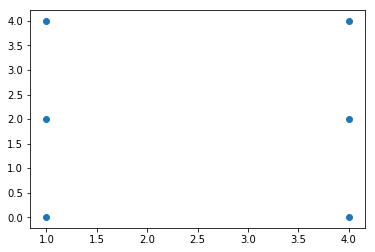

In [25]:
X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])
plt.scatter(X[:,0],X[:,1])

In [23]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_

array([0, 0, 0, 1, 1, 1], dtype=int32)

In [24]:
kmeans.predict([[0, 0], [4, 4]])

array([0, 1], dtype=int32)

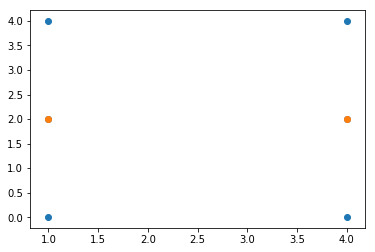

In [22]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1])